## Minor Project

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.datasets import fetch_openml

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [ ]:
mnist = fetch_openml( "mnist_784")

In [ ]:
x= mnist["data"]
y= mnist["target"]
X=np.array(x)
X.shape

(70000, 784)

In [ ]:
x = pd.get_dummies(x)
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_train=x[:60000]
x_test=x[60001:]
y_train = y[:60000]
y_test = y[60001:]
y_test.shape

(9999,)

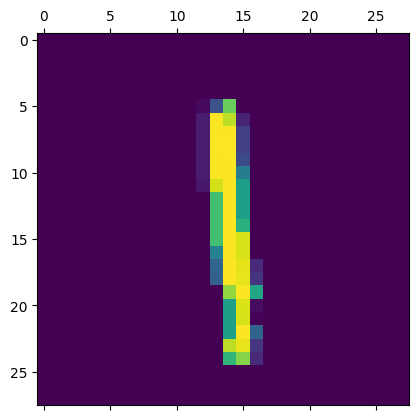

In [32]:
plt.matshow(X[8].reshape(28, 28))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

## Classification

SUPPORT VECTOR MACHINE

In [ ]:
svm_model = svm.SVC(tol = 0.1)

In [ ]:
svm_model.fit(x_train, y_train)

SVC(tol=0.1)

In [ ]:
y_svm = svm_model.predict(x_test)

Accuracy of SVM model: 97.94979497949795


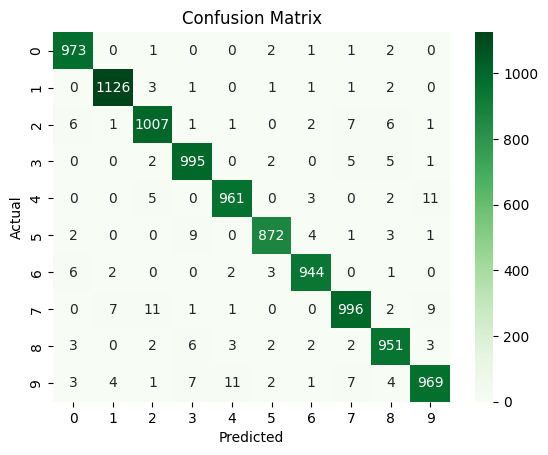

In [ ]:
print("Accuracy of SVM model:", accuracy_score(y_test, y_svm)*100)
sns.heatmap(confusion_matrix(y_test, y_svm), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

K - NEAREST NEIGHBOUR

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,algorithm='auto',n_jobs=10)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_jobs=10)

In [ ]:
y_knn = knn.predict(x_test)


Accuracy of Classifier on Validation Image Data:  96.87968796879687


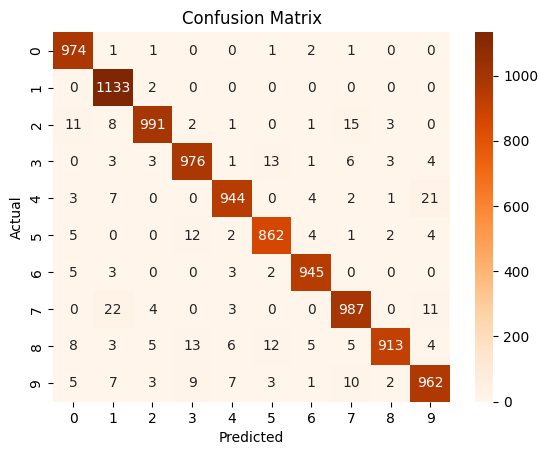

In [ ]:
print('\nAccuracy of Classifier on Validation Image Data: ',accuracy_score(y_test, y_knn)*100)
sns.heatmap(confusion_matrix(y_test, y_knn), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

RANDOM FOREST CLASSIFIER

In [ ]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=10)

In [ ]:
clf.fit(x_train,y_train)

RandomForestClassifier(n_jobs=10)

In [ ]:
y_pred = clf.predict(x_test)


Accuracy of Classifier on Validation Image Data:  97.03970397039704


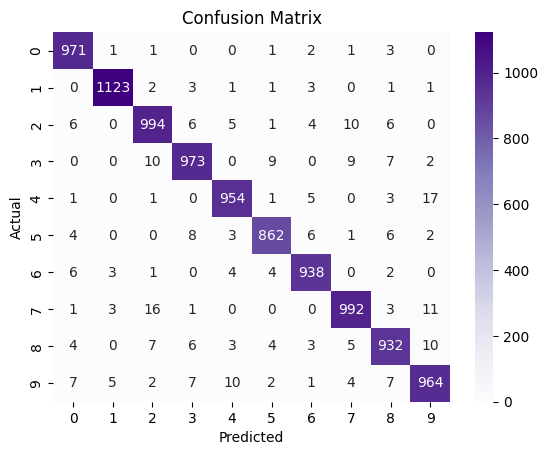

In [ ]:
print('\nAccuracy of Classifier on Validation Image Data: ',accuracy_score(y_test, y_pred)*100)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

CONVOLUTIONAL NEURAL NETWORK

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Convert labels
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')
x_train = x_train.to_numpy().reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.to_numpy().reshape(-1, 28, 28, 1) / 255.0

In [26]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = cnn.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 26ms/step - accuracy: 0.8986 - loss: 0.3278 - val_accuracy: 0.9835 - val_loss: 0.0491
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9851 - loss: 0.0482 - val_accuracy: 0.9853 - val_loss: 0.0450
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9897 - loss: 0.0324 - val_accuracy: 0.9886 - val_loss: 0.0349
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9923 - loss: 0.0226 - val_accuracy: 0.9905 - val_loss: 0.0272
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 27ms/step - accuracy: 0.9946 - loss: 0.0178 - val_accuracy: 0.9897 - val_loss: 0.0333


In [27]:
cnn.save('mnist.h5')
from google.colab import files
files.download('mnist.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
y_cnn_probs = cnn.predict(x_test)
y_cnn = np.argmax(y_cnn_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


In [30]:
cm=confusion_matrix(y_test, y_cnn)


Accuracy of Classifier on Validation Image Data:  99.43333268165588


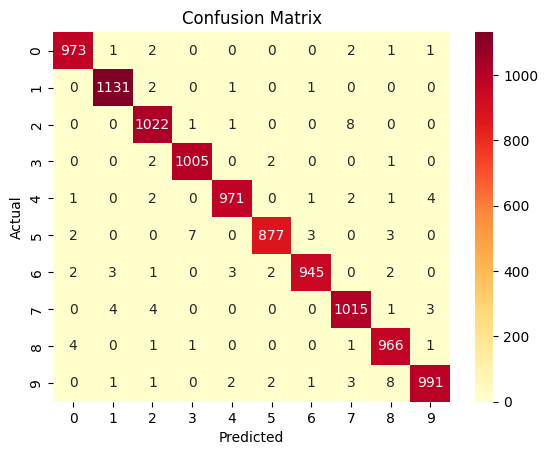

In [31]:
print('\nAccuracy of Classifier on Validation Image Data: ',history.history['accuracy'][-1]*100)
sns.heatmap(cm, annot=True, fmt='d', cmap="YlOrRd")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Canvas

In [ ]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np

# model = load_model("C:/Users/Hp/OneDrive/Desktop/mnist.h5")s

def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))

    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)

    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0

    #predicting the class
    res = model.predict([img])[0]
    return np.argmax(res), max(res)

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0

        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command =         self.classify_handwriting)
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)

        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)

        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() # get the handle of the canvas
        rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        im = ImageGrab.grab(rect)

        digit, acc = predict_digit(im)
        self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')

    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')

app = App()
mainloop()